In [112]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [113]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [114]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[0]
        if emotion=='a':
          e='anger'
        if emotion=='d':
          e='disgust'
        if emotion=='f':
          e='fear'
        if emotion=='h':
          e='happy'
        if emotion=='n':
          e='neutral'
        if emotion=='s':
          if file_name[1]=='a':
            e='sad'
          else:
            e='surprise'
        feature=extract_feature(file,mfcc=True,chroma=True,mel=True,zcr=True,rmse=True)
        x.append(feature)
        y.append(e)
    return train_test_split(np.array(x), y, test_size=test_size)

In [115]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04800415 0.04800415 0.04800415 ... 0.04083252 0.04013062 0.03955078] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03921509 0.03930664 0.03967285 ... 0.03988647 0.03997803 0.03997803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03994751 0.03988647 0.03982544 ... 0.03952026 0.03952026 0.03948975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03952026 0.03952026 0.0395813  .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05084229 0.05078125 0.0506897  ... 0.03967285 0.03964233 0.03967285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05154419 0.05151367 0.05145264 ... 0.03829956 0.03833008 0.0383606 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0383606  0.0383606  0.03839111 ... 0.03973389 0.03970337 0.03967285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03964233 0.03964233 0.03967285 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03933716 0.03930664 0.03924561 ... 0.03952026 0.0395813  0.03952026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03939819 0.03921509 0.0390625  ... 0.01571655 0.01571655 0.01571655] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04037476 0.04031372 0.04025269 ... 0.03894043 0.03900146 0.03900146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03909302 0.03918457 0.03924561 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03933716 0.03942871 0.03942871 ... 0.04083252 0.040802   0.04077148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04074097 0.04067993 0.0406189  ... 0.04064941 0.04058838 0.04052734] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04052734 0.04055786 0.04058838 ... 0.04049683 0.04049683 0.04049683] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05010986 0.05007935 0.05010986 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04003906 0.04006958 0.04006958 ... 0.03997803 0.04000854 0.03997803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03988647 0.03973389 0.03961182 ... 0.03939819 0.03933716 0.03924561] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03918457 0.03918457 0.03921509 ... 0.03869629 0.03866577 0.03857422] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03851318 0.03851318 0.03857422 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05374146 0.05361938 0.0534668  ... 0.04098511 0.04092407 0.040802  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05285645 0.05288696 0.05291748 ... 0.03985596 0.0397644  0.03967285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03955078 0.03945923 0.03933716 ... 0.0401001  0.04000854 0.03994751] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03997803 0.04000854 0.04003906 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01477051 0.01480103 0.01489258 ... 0.01379395 0.01382446 0.01382446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0526123  0.05258179 0.05255127 ... 0.03845215 0.03839111 0.0383606 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01501465 0.01477051 0.0145874  ... 0.01434326 0.01425171 0.01422119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01425171 0.01422119 0.01419067 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04040527 0.04046631 0.04055786 ... 0.04037476 0.04034424 0.04031372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0402832  0.0402832  0.04022217 ... 0.04058838 0.04067993 0.04077148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04086304 0.04092407 0.04095459 ... 0.04067993 0.04052734 0.04034424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0506897  0.05059814 0.05059814 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01434326 0.01434326 0.01437378 ... 0.01397705 0.01400757 0.0140686 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01419067 0.01431274 0.0144043  ... 0.01385498 0.01397705 0.01412964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01428223 0.01437378 0.01434326 ... 0.01504517 0.01507568 0.01519775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01409912 0.01412964 0.01416016 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05050659 0.05050659 0.05047607 ... 0.03793335 0.03796387 0.03799438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03799438 0.03799438 0.03796387 ... 0.03948975 0.03942871 0.03930664] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03915405 0.0390625  0.03903198 ... 0.01309204 0.01312256 0.01318359] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01321411 0.01324463 0.01330566 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05059814 0.05050659 0.05041504 ... 0.03909302 0.03903198 0.03897095] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03890991 0.03884888 0.03878784 ... 0.01391602 0.0138855  0.01379395] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01370239 0.01361084 0.01361084 ... 0.01339722 0.01339722 0.01339722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0133667  0.01333618 0.01333618 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.05111694 0.05096436 0.0508728  ... 0.03894043 0.03897095 0.03900146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03897095 0.03894043 0.03887939 ... 0.03924561 0.03924561 0.03918457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.03915405 0.0390625  0.0390625  ... 0.03833008 0.0383606  0.03848267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04959106 0.04953003 0.04953003 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04016113 0.0401001  0.04013062 ... 0.01428223 0.01425171 0.01416016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.04989624 0.04986572 0.04986572 ... 0.009552   0.00952148 0.00946045] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00946045 0.00946045 0.00946045 ... 0.01464844 0.0145874  0.01452637] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.01446533 0.0144043  0.01431274 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00537109 0.00534058 0.00531006 ... 0.00170898 0.00170898 0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00170898 0.00170898 0.00167847 ... 0.00134277 0.00131226 0.00131226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00128174 0.00131226 0.00131226 ... 0.00158691 0.00158691 0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0015564  0.0015564  0.0015564  .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00134277 0.00131226 0.00137329 ... 0.00146484 0.00149536 0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00582886 0.00579834 0.00576782 ... 0.00143433 0.00140381 0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00143433 0.00146484 0.00143433 ... 0.00149536 0.00152588 0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.0015564  0.0015564  0.0015564  .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00170898 0.00170898 0.00170898 ... 0.00137329 0.00137329 0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00131226 0.00131226 0.00131226 ... 0.00134277 0.00134277 0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00521851 0.00524902 0.00524902 ... 0.00427246 0.00424194 0.00427246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00430298 0.00430298 0.00436401 .

<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00546265 0.00546265 0.00543213 ... 0.00421143 0.00424194 0.00421143] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00421143 0.00424194 0.00424194 ... 0.00405884 0.00408936 0.00402832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00402832 0.0039978  0.0039978  ... 0.00134277 0.00134277 0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-113-9dabec9f0adb>:14: FutureWarning: Pass y=[0.00131226 0.00134277 0.00134277 .

In [117]:
#Load the data and extract features for each sound file
def labels():
    y=[];
    for file in glob.glob("D:/AAA_video_course/Programming/A_main/zzzdatasets/SAVEE/AudioData/Actor*/*.wav"):
        file_name=os.path.basename(file)
        emotion=file_name[0]
        if emotion=='a':
          e='anger'
        if emotion=='d':
          e='disgust'
        if emotion=='f':
          e='fear'
        if emotion=='h':
          e='happy'
        if emotion=='n':
          e='neutral'
        if emotion=='s':
          if file_name[1]=='a':
            e='sad'
          else:
            e='surprise'
       
        y.append(e)
    return y

In [118]:
y = labels()
df = pd.DataFrame(y, columns =['emo'])
df

,emo
0,anger
1,anger
2,anger
3,anger
4,anger
...,...
475,surprise
476,surprise
477,surprise
478,surprise


In [119]:
df.groupby('emo').size()

emo
anger        60
disgust      60
fear         60
happy        60
neutral     120
sad          60
surprise     60
dtype: int64

In [120]:
final_labels  = ['anger',
'disgust',
'fear',
'happy' ,
'neutral',
'sad'     , 
'surprise']

In [121]:
"""from matplotlib.pyplot import figure

bars = plt.barh(final_labels ,df.groupby('emo').size())
plt.bar_label(bars)
"""

"from matplotlib.pyplot import figure\n\nbars = plt.barh(final_labels ,df.groupby('emo').size())\nplt.bar_label(bars)\n"

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

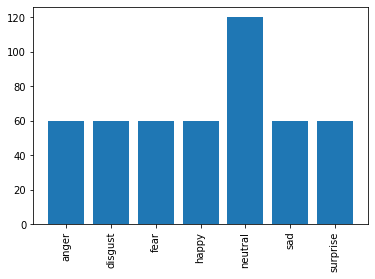

In [122]:
import matplotlib.pyplot  as plt
plt.bar(final_labels,df.groupby('emo').size())
plt.xticks(rotation=90)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [124]:
import time
start = time.time()
model=MLPClassifier(alpha=0.0001, batch_size=32, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate='constant',activation='logistic',solver='adam',max_iter=600)
model.fit(x_train,y_train)
end = time.time()
train_time_total=end-start
print(train_time_total)

12.628232955932617


In [125]:
start = time.time()
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Logistic-Accuracy: {:.2f}%".format(accuracy*100))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
end = time.time()
test_time_total=end-start
print(test_time_total)

Logistic-Accuracy: 66.67%
              precision    recall  f1-score   support

       anger       0.75      0.60      0.67        10
     disgust       0.90      0.64      0.75        14
        fear       0.44      0.33      0.38        12
       happy       0.53      0.73      0.62        11
     neutral       0.68      0.79      0.73        19
         sad       0.71      0.80      0.75        15
    surprise       0.67      0.67      0.67        15

    accuracy                           0.67        96
   macro avg       0.67      0.65      0.65        96
weighted avg       0.68      0.67      0.66        96

0.009967565536499023


In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,normalize='true')
conf_matrix= pd.DataFrame(cm,columns=None)
conf_matrix.to_csv(r'D:/thesis_codes/output/confusion_matrix.csv', index = False, header=False)

In [128]:
from imblearn.metrics import specificity_score
s=specificity_score(y_test,y_pred,average='macro')
print(s)

0.9440437760517805


In [129]:
from sklearn.metrics import roc_auc_score
y_pred=model.predict_proba(x_test)
auc=roc_auc_score(y_test, y_pred, average='macro',multi_class='ovo')
print(auc)

0.930778307601616


In [130]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred=model.predict(x_test)
p=precision_score(y_test, y_pred,average='macro')
r=recall_score(y_test, y_pred,average='macro')
f=f1_score(y_test, y_pred,average='macro')
print(p,r,f)

0.6688778541719718 0.6513719363343424 0.6516253781062143


In [131]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[0.6        0.64285714 0.33333333 0.72727273 0.78947368 0.8
 0.66666667]
[0.02777778 0.01388889 0.06998557 0.09722222 0.08015873 0.04699248
 0.07070707]


In [132]:
from pandas import DataFrame
C = {
     'test acc':[str(accuracy)],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'total train time':[str(train_time_total)],
     'total test time':[str(test_time_total)]}
df = DataFrame(C, columns= ['test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','total train time','total test time'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

             test acc    precision(macro)       recall(macro)  \
0  0.6666666666666666  0.6688778541719718  0.6513719363343424   

            f1(macro)  specificity(macro)         AUC(macro)  \
0  0.6516253781062143  0.9440437760517805  0.930778307601616   

     total train time       total test time  
0  12.628232955932617  0.009967565536499023  


In [133]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'D:/thesis_codes/output.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  0.600000  0.027778
1  0.642857  0.013889
2  0.333333  0.069986
3  0.727273  0.097222
4  0.789474  0.080159
5  0.800000  0.046992
6  0.666667  0.070707


In [134]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 6  0  1  3  0  0  0]
 [ 0  9  1  0  3  1  0]
 [ 2  1  4  1  0  0  4]
 [ 0  0  2  8  0  0  1]
 [ 0  0  0  0 15  4  0]
 [ 0  0  0  0  3 12  0]
 [ 0  0  1  3  1  0 10]]


In [156]:
cm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([60.        , 64.28571429, 33.33333333, 72.72727273, 78.94736842,
       80.        , 66.66666667])

Text(0.5, 1.0, 'accuracy of each class')

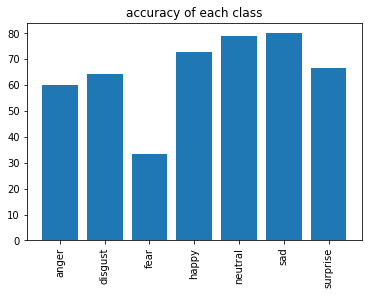

In [164]:
plt.bar(final_labels,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

In [158]:
df = pd.DataFrame(np.array(y_test), columns = ['actual'])
df['predicted'] = np.array(y_pred)
df
     

,actual,predicted
0,fear,fear
1,fear,fear
2,anger,happy
3,sad,sad
4,anger,anger
...,...,...
91,sad,neutral
92,neutral,neutral
93,surprise,surprise
94,surprise,fear


In [168]:
#chek if confusion matrix is correctly labeled 



correct = 0;
for i in range(len(df)):
    if (df['actual'][i]=='disgust' and df['predicted'][i]== 'disgust'):
        correct  = correct+1
correct


9

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'anger'),
  Text(0, 1.5, 'disgust'),
  Text(0, 2.5, 'fear'),
  Text(0, 3.5, 'happy'),
  Text(0, 4.5, 'neutral'),
  Text(0, 5.5, 'sad'),
  Text(0, 6.5, 'surprise')])

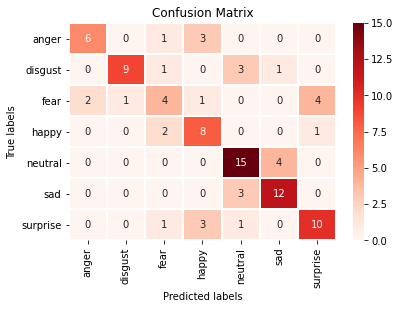

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(final_labels); ax.yaxis.set_ticklabels(final_labels);
plt.xticks(rotation=90)
plt.yticks(rotation=0)